Author : Jijong Park, jjp9303kr@icloud.com  
Supervisor : In-seop Na, ypencil@hanmail.net  
Starting Project 2019.01.07

In [1]:
# import libs
import pandas as pd
import numpy as np
import seaborn as sns
from concorde.tsp import TSPSolver
from matplotlib import collections as mc
import pylab as pl
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cities = pd.read_csv('./data/cities.csv')

In [3]:
solver = TSPSolver.from_data(cities.X, cities.Y, norm="EUC_2D")

t = time.time()
tour_data = solver.solve(time_bound = 60.0, verbose = True, random_seed = 42)
print(time.time() - t)
print(tour_data.found_tour)

9948.985518455505
True


In [4]:
pd.DataFrame({'Path': np.append(tour_data.tour,[0])}).to_csv('submission.csv', index=False)

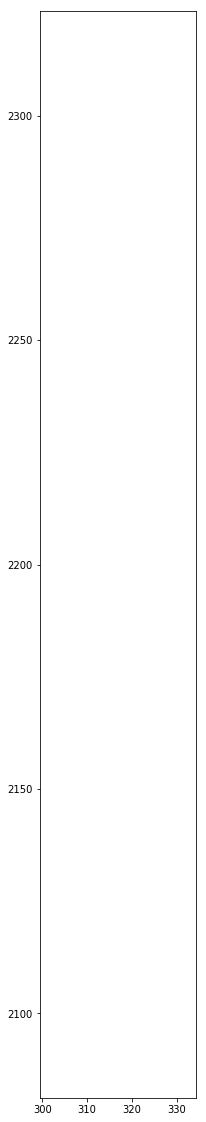

In [5]:
lines = [[(cities.X[tour_data.tour[i]],cities.Y[tour_data.tour[i]]),(cities.X[tour_data.tour[i+1]],cities.Y[tour_data.tour[i+1]])] for i in range(0,len(cities)-1)]
lc = mc.LineCollection(lines, linewidths=2)
fig, ax = pl.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.add_collection(lc)
ax.autoscale()